In [5]:
import random
import pandas as pd
from bs4 import BeautifulSoup
import re


colors = ["siyah", "beyaz", "kırmızı", "mavi", "yeşil", "bej", "mor", "pembe", "gri", "lacivert"]
categories = {
    "gömlek": ["klasik yaka", "slim fit", "düğmeli", "uzun kollu"],
    "pantolon": ["yüksek bel", "dar paça", "lastikli", "rahat kesim"],
    "ceket": ["astar detaylı", "düğmeli", "kruvaze", "cepli"],
    "sweatshirt": ["kapüşonlu", "baskılı", "oversize", "fermuarlı"],
    "etek": ["mini", "pileli", "kalem", "asimetri kesim"],
    "elbise": ["askılı", "dantel detaylı", "uzun", "v yaka"],
    "t-shirt": ["baskılı", "basic", "oversize", "bisiklet yaka"],
    "hırka": ["örgü", "düğmeli", "cepli", "uzun"],
    "bluz": ["kruvaze", "omzu açık", "volanlı", "dantel detaylı"],
    "çanta": ["el çantası", "sırt çantası", "omuz çantası", "kapitoneli"]
}
materials = ["%100 pamuk", "polyester", "viskon", "likralı kumaş", "kot kumaş", "saten", "örme kumaş", "deri görünümlü"]
features = [
    "esnek yapı", "rahat kalıp", "şık tasarım", "günlük kullanım için uygun",
    "çift cepli", "düğmeli model", "yumuşak doku", "kolay ütülenir", "nefes alabilir kumaş"
]

description_templates = [
    "Yeni sezonun favori parçalarından biri olan bu {category}, {material} kumaşı sayesinde {features}.",
    "Her gardıropta olması gereken bu {category}, {material} içeriğiyle {features}.",
    "{category_cap} modeli, {material} kumaştan üretilmiş olup {features}.",
    "Bu özel tasarım {category}, {material} yapısıyla {features}.",
    "{material} tercih edilerek üretilen bu {category}, {features}.",
]

def generate_fake_html(color, category):
    material = random.choice(materials)
    feats = random.sample(features, k=random.randint(2, 4))
    feats_sentence = ", ".join(feats[:-1]) + " ve " + feats[-1] if len(feats) > 1 else feats[0]
    template = random.choice(description_templates)
    description = template.format(
        category=category,
        category_cap=category.capitalize(),
        material=material,
        features=feats_sentence
    )
    extra = random.choice([
        "Hem şıklık hem konfor bir arada.",
        "Sezonun trend renkleriyle kombin yapabilirsiniz.",
        "Sade ama etkileyici bir görünüm sunar.",
        "Ofisten sokağa her ortama uyum sağlar.",
        "Gardırobunuzun vazgeçilmezi olmaya aday."
    ])
    ul_items = [f"<li>{f}</li>" for f in feats]
    html = f"""
    <html>
      <body>
        <div class="product-info">
          <span class="color">Renk: {color}</span>
          <h1>{category.capitalize()} - {random.choice(categories[category])}</h1>
          <p class="desc">{description}</p>
          <p>{extra}</p>
          <ul class="features">
            {"".join(ul_items)}
          </ul>
        </div>
      </body>
    </html>
    """
    return html

def turkish_sent_tokenize(text):
    # Basit ve genel cümle bölücü
    sentences = re.split(r'(?<=[.!?]) +', text)
    return [s.strip() for s in sentences if s.strip()]

def extract_description(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    desc = []
    title = soup.find('h1')
    if title:
        desc.append(title.get_text(strip=True))
    p_tags = soup.find_all('p')
    for p in p_tags:
        desc.append(p.get_text(strip=True))
    ul = soup.find('ul')
    if ul:
        li_items = [li.get_text(strip=True) for li in ul.find_all('li')]
        desc.append("Öne çıkan özellikler: " + ", ".join(li_items))
    full_text = " ".join(desc)
    sentences = turkish_sent_tokenize(full_text)
    return " ".join(sentences)

def generate_dataset(record_count=3452):
    dataset = []
    for _ in range(record_count):
        color = random.choice(colors)
        category = random.choice(list(categories.keys()))
        fake_html = generate_fake_html(color, category)
        description = extract_description(fake_html)
        dataset.append({
            "description": description,
            "color": color,
            "category": category
        })
    return pd.DataFrame(dataset)

if __name__ == "__main__":
    df = generate_dataset(3452)
    df.to_csv("trendyol_urun_aciklamalari.csv", index=False)
    print("Dosya oluşturuldu: trenyol_urun_aciklamalari.csv")


Dosya oluşturuldu: trenyol_urun_aciklamalari.csv


In [ ]:
#HAM VERİ ÖRNEĞİ;description,color,category
"Gömlek - klasik yaka Bu gömlek, %100 pamuk kumaştan üretilmiştir. Esnek yapı, şık tasarım ve çift cepli özellikleriyle öne çıkar. Sade ama etkileyici bir görünüm sunar. Öne çıkan özellikler: esnek yapı, şık tasarım, çift cepli",siyah,gömlek



Grafik 'trendyol_zipf.png' olarak kaydedildi.


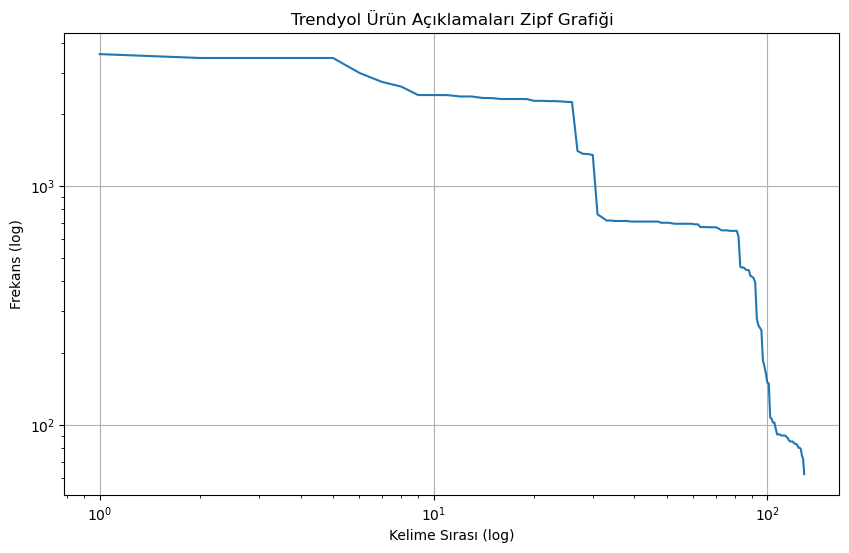

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import re

df = pd.read_csv("trendyol_urun_aciklamalari.csv")

def zipf_plot(texts, title="Zipf Grafiği", output_filename="zipf_plot.png"): 
    words = []
    for t in texts:
       
        if not isinstance(t, str):
            t = str(t)
        words.extend(re.findall(r'\b\w+\b', t.lower()))
    freq = Counter(words)
    ranked_freq = sorted(freq.values(), reverse=True)
    ranks = range(1, len(ranked_freq)+1)

    plt.figure(figsize=(10,6))
    plt.loglog(ranks, ranked_freq)
    plt.xlabel("Kelime Sırası (log)")
    plt.ylabel("Frekans (log)")
    plt.title(title)
    plt.grid(True)

   
    plt.savefig(output_filename)
    print(f"Grafik '{output_filename}' olarak kaydedildi.") 
    plt.show() 

#
zipf_plot(df["description"], title="Trendyol Ürün Açıklamaları Zipf Grafiği", output_filename="trendyol_zipf.png")



In [9]:
import os

# data klasörünü kontrol et
if not os.path.exists("data"):
    os.makedirs("data")
    print("data/ klasörü oluşturuldu.")
else:
    print("data/ klasörü zaten var.")


data/ klasörü oluşturuldu.


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\furka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import os
print(os.getcwd())


C:\Users\furka\TY VERİ ÇEKME PROJE


In [10]:
print(os.listdir())


['.ipynb_checkpoints', 'trendyol_urun_aciklamalari.csv', 'trendyol_zipf.png', 'Untitled.ipynb']


In [13]:
import pandas as pd
import re
import os


giris_csv = "trendyol_urun_aciklamalari.csv"
cikis_csv = "urun_aciklamalari_stopword_temizlenmis.csv"


stop_words = {
    've', 'bir', 'bu', 'da', 'de', 'ile', 'için', 'mi', 'ne', 'ama', 'fakat',
    'gibi', 'daha', 'çok', 'az', 'her', 'şu', 'o', 'ki', 'ya', 'en', 'ben',
    'sen', 'biz', 'siz', 'onlar', 'mı', 'mu', 'mü', 'miyim', 'musun', 'müydü',
    'değil', 'neden', 'nasıl', 'hangi', 'hiç', 'hep', 'şey', 'çünkü', 'veya',
    'vardır', 'yoktur', 'olan', 'olduğu', 'olabilir', 'ise', 'ancak', 'artık',
    'hala', 'bazı', 'tam', 'nerede', 'kim', 'kaç', 'kadar', 'sonra', 'önce',
    'ürün', 'özellik', 'özellikleriyle', 'renk'
}


def temizle_ve_isle(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = re.findall(r'\b\w+\b', text)
    tokens = [t for t in tokens if t not in stop_words]
    return tokens


df = pd.read_csv(giris_csv)

df["tokens_clean"] = df["description"].apply(temizle_ve_isle)


df.to_csv(cikis_csv, index=False)

print(f" Temizlenmiş dosya kaydedildi: {cikis_csv}")



 Temizlenmiş dosya kaydedildi: urun_aciklamalari_stopword_temizlenmis.csv


In [19]:
pip install pandas nltk



   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ----------------

In [2]:

import os
print(os.listdir())


['.ipynb_checkpoints', 'trendyol_urun_aciklamalari.csv', 'trendyol_zipf.png', 'Untitled.ipynb', 'urun_aciklamalari_stopword_temizlenmis.csv']


In [15]:
import csv
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


nltk.download('stopwords')


stop_words = set(stopwords.words('turkish'))


lemmatization_dict = {
    "kadın": "kadın", "kadını": "kadın", "kadınlar": "kadın",
    "erkek": "erkek", "erkekler": "erkek",
    "çocuk": "çocuk", "çocuklar": "çocuk",
    "ayakkabı": "ayakkabı", "ayakkabılar": "ayakkabı",
    "elbise": "elbise", "elbisesi": "elbise",
    "pantolon": "pantolon", "pantolonu": "pantolon"
}


def basit_stemmer(kelime):
    ekler = ["lar", "ler", "lı", "li", "lu", "lü", "ın", "in", "un", "ün", "dan", "den", "ya", "e", "i", "a"]
    for ek in ekler:
        if kelime.endswith(ek) and len(kelime) > len(ek) + 2:
            return kelime[:-len(ek)]
    return kelime


tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b', flags=re.UNICODE)


def temizle_metin(metin):
    metin = metin.lower()
    kelimeler = tokenizer.tokenize(metin)
    kelimeler = [k for k in kelimeler if k not in stop_words]
    lemmatize_edilmis = [lemmatization_dict.get(k, k) for k in kelimeler]
    stemlenmis = [basit_stemmer(k) for k in lemmatize_edilmis]
    return stemlenmis


dosya_yolu = "trendyol_urun_aciklamalari.csv"
temizlenmis_veriler = []

with open(dosya_yolu, "r", encoding="utf-8") as dosya:
    reader = csv.DictReader(dosya)
    for satir in reader:
        try:
            metin = f"{satir['description']} {satir['color']} {satir['category']}"
            temiz = temizle_metin(metin)
            temizlenmis_veriler.append({
                "orijinal": metin,
                "tokenler": temiz
            })
        except KeyError as e:
            print("Eksik sütun:", e)


for i, veri in enumerate(temizlenmis_veriler[:2000]):
    print(f"\n--- {i+1} ---")
    print("Orijinal:", veri["orijinal"])
    print("Tokenler:", veri["tokenler"])



--- 1 ---
Orijinal: Bluz - volanlı viskon tercih edilerek üretilen bu bluz, şık tasarım, kolay ütülenir ve günlük kullanım için uygun. Gardırobunuzun vazgeçilmezi olmaya aday. Öne çıkan özellikler: şık tasarım, kolay ütülenir, günlük kullanım için uygun mavi bluz
Tokenler: ['bluz', 'volan', 'viskon', 'tercih', 'edilerek', 'üretilen', 'bluz', 'şık', 'tasarım', 'kolay', 'ütülenir', 'günlük', 'kullanım', 'uyg', 'gardırobunuz', 'vazgeçilmez', 'olma', 'aday', 'öne', 'çıkan', 'özellik', 'şık', 'tasarım', 'kolay', 'ütülenir', 'günlük', 'kullanım', 'uyg', 'mav', 'bluz']

--- 2 ---
Orijinal: Çanta - el çantası Yeni sezonun favori parçalarından biri olan bu çanta, polyester kumaşı sayesinde yumuşak doku, nefes alabilir kumaş ve düğmeli model. Gardırobunuzun vazgeçilmezi olmaya aday. Öne çıkan özellikler: yumuşak doku, nefes alabilir kumaş, düğmeli model yeşil çanta
Tokenler: ['çant', 'el', 'çantası', 'yen', 'sezon', 'favor', 'parçaların', 'olan', 'çant', 'polyester', 'kumaşı', 'sayesind', 'yumu

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\furka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import csv
import string
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


nltk.download('stopwords')


stop_words = set(stopwords.words('turkish'))


lemmatization_dict = {
    "kadın": "kadın", "kadını": "kadın", "kadınlar": "kadın",
    "erkek": "erkek", "erkekler": "erkek",
    "çocuk": "çocuk", "çocuklar": "çocuk",
    "ayakkabı": "ayakkabı", "ayakkabılar": "ayakkabı",
    "elbise": "elbise", "elbisesi": "elbise",
    "pantolon": "pantolon", "pantolonu": "pantolon"
}

def basit_stemmer(kelime):
    ekler = ["lar", "ler", "lı", "li", "lu", "lü", "ın", "in", "un", "ün", "dan", "den", "ya", "e", "i", "a"]
    for ek in ekler:
        if kelime.endswith(ek) and len(kelime) > len(ek) + 2:
            return kelime[:-len(ek)]
    return kelime

tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b', flags=re.UNICODE)


def temizle_metin(metin):
    metin = metin.lower()
    kelimeler = tokenizer.tokenize(metin)
    kelimeler = [k for k in kelimeler if k not in stop_words]
    lemmatize_edilmis = [lemmatization_dict.get(k, k) for k in kelimeler]
    stemlenmis = [basit_stemmer(k) for k in lemmatize_edilmis]
    return stemlenmis


girdi_dosyasi = "trendyol_urun_aciklamalari.csv"
cikti_dosyasi = "temizlenmis_urunler.csv"


temizlenmis_veriler = []

with open(girdi_dosyasi, "r", encoding="utf-8") as dosya:
    reader = csv.DictReader(dosya)
    for satir in reader:
        try:
            metin = f"{satir['description']} {satir['color']} {satir['category']}"
            temiz = temizle_metin(metin)
            temizlenmis_veriler.append({
                "orijinal": metin,
                "tokenler": " ".join(temiz)
            })
        except KeyError as e:
            print(f"Satır atlandı. Eksik sütun: {e}")


with open(cikti_dosyasi, "w", newline="", encoding="utf-8") as dosya:
    alanlar = ["orijinal", "tokenler"]
    yazici = csv.DictWriter(dosya, fieldnames=alanlar)
    yazici.writeheader()
    yazici.writerows(temizlenmis_veriler)

print(f"\n Temizlenmiş veriler '{cikti_dosyasi}' dosyasına kaydedildi.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\furka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



 Temizlenmiş veriler 'temizlenmis_urunler.csv' dosyasına kaydedildi.


In [19]:
import csv
import string
from nltk.tokenize import wordpunct_tokenize


turkce_stopwords = {
    "ve", "bir", "bu", "da", "de", "ile", "için", "mi", "mu", "mü", "ne",
    "ben", "sen", "o", "biz", "siz", "onlar", "mı", "daha", "çok", "gibi", "ama"
}


def basit_stemmer(kelime):
    ekler = ["lar", "ler", "lık", "lik", "cık", "cik", "cu", "cü", "ci", "cı", "muş", "miş", "yor", "du", "ti", "di", "ken", "im", "in", "de", "da", "e", "a", "i", "ı", "u", "ü", "m"]
    for ek in sorted(ekler, key=len, reverse=True):
        if kelime.endswith(ek) and len(kelime) > len(ek) + 2:
            return kelime[:-len(ek)]
    return kelime


def temizle_ve_stemle(metin):
    metin = metin.lower()
    metin = metin.translate(str.maketrans("", "", string.punctuation))
    kelimeler = wordpunct_tokenize(metin)
    kelimeler = [k for k in kelimeler if k not in turkce_stopwords]
    stemlenmis = [basit_stemmer(k) for k in kelimeler]
    return " ".join(stemlenmis)


ornek_veri = [
    {"description": "Şık kırmızı elbise", "color": "Kırmızı", "category": "Kadın Giyim"},
    {"description": "Erkek deri ceket", "color": "Siyah", "category": "Erkek Giyim"},
    {"description": "Çocuk spor ayakkabı", "color": "Mavi", "category": "Çocuk Ayakkabı"},
]


stemlenmis_veriler = []
for satir in ornek_veri:
    metin = f"{satir['description']} {satir['color']} {satir['category']}"
    stemlenmis = temizle_ve_stemle(metin)
    stemlenmis_veriler.append({"stemlenmis": stemlenmis})


csv_yolu = "sadece_stemlenmis.csv"  


with open(csv_yolu, "w", newline="", encoding="utf-8") as dosya:
    writer = csv.DictWriter(dosya, fieldnames=["stemlenmis"])
    writer.writeheader()
    writer.writerows(stemlenmis_veriler)

print(f"Dosya kaydedildi: {csv_yolu}")



Dosya kaydedildi: sadece_stemlenmis.csv


In [25]:
import csv
import string

stop_words = {
    "ve", "ile", "bir", "bu", "şu", "için", "ama", "gibi", "çok", "daha", "az", "en",
    "mi", "mu", "mü", "mı", "da", "de", "ki", "ya", "o", "eğer", "ise", "ya", "diye",
    "veya", "ve", "ile", "hem", "her", "hiç", "kadar", "nasıl", "neden", "ne", "niçin"
}

ekler = [
    "lar", "ler", "nın", "nin", "nun", "nün", "dan", "den", "ya", "ye", "da", "de",
    "a", "e", "yı", "yi", "yu", "yü", "ın", "in", "un", "ün", "mız", "miz", "muz", "müz"
]

def temizle_metin(metin):
    metin = metin.lower()
    metin = metin.translate(str.maketrans("", "", string.punctuation))
    kelimeler = metin.split()
    kelimeler = [k for k in kelimeler if k not in stop_words]
    return kelimeler

def lemmatize(kelime):
    for ek in sorted(ekler, key=len, reverse=True):
        if kelime.endswith(ek) and len(kelime) > len(ek) + 1:
            return kelime[:-len(ek)]
    return kelime

lemmatize_veriler = []

with open("trendyol_urun_aciklamalari.csv", newline="", encoding="utf-8") as dosya:
    reader = csv.DictReader(dosya)
    for satir in reader:
        metin = f"{satir['description']} {satir['color']} {satir['category']}"
        kelimeler = temizle_metin(metin)
        lemmatize_edilmis = " ".join([lemmatize(k) for k in kelimeler])
        lemmatize_veriler.append({"lemmatize": lemmatize_edilmis})

with open("lemmatize_edilmis.csv", "w", newline="", encoding="utf-8") as dosya:
    writer = csv.DictWriter(dosya, fieldnames=["lemmatize"])
    writer.writeheader()
    writer.writerows(lemmatize_veriler)


In [8]:
import csv
from collections import Counter
import math

kelime_listesi = []

with open("stemlenmis_veriler.csv", newline="", encoding="utf-8") as dosya:
    reader = csv.DictReader(dosya)
    for satir in reader:
        kelimeler = satir["stemlenmis"].split()
        kelime_listesi.extend(kelimeler)

frekanslar = Counter(kelime_listesi)
sirali = frekanslar.most_common()

print(f"{'Rank':<6}{'Kelime':<20}{'Frekans':<10}{'Zipf Yaklaşık'}")
print("-" * 50)

for i, (kelime, frekans) in enumerate(sirali, start=1):
    zipf_deger = sirali[0][1] / i
    print(f"{i:<6}{kelime:<20}{frekans:<10}{zipf_deger:.2f}")
    if i >= 200:  # İlk 50 kelimeyi göster
        break


Rank  Kelime              Frekans   Zipf Yaklaşık
--------------------------------------------------
1     kumaş               4279      4279.00
2     öne                 3452      2139.50
3     çıkan               3452      1426.33
4     özellik             3452      1069.75
5     model               3053      855.80
6     tasarı              2988      713.17
7     şık                 2973      611.29
8     düğmel              2619      534.88
9     cepl                2413      475.44
10    kolay               2412      427.90
11    ütülenir            2412      389.00
12    yumuşak             2380      356.58
13    dok                 2380      329.15
14    rahat               2347      305.64
15    günlük              2322      285.27
16    kullanı             2322      267.44
17    uygun               2322      251.71
18    nefes               2282      237.72
19    alabilir            2282      225.21
20    esnek               2276      213.95
21    yap                 2276     

In [2]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------

In [1]:

import csv
from collections import Counter

kelime_listesi = []


with open("stemlenmis_veriler.csv", newline="", encoding="utf-8") as dosya:
    reader = csv.DictReader(dosya)
    for satir in reader:
        kelimeler = satir["stemlenmis"].split()
        kelime_listesi.extend(kelimeler)


frekanslar = Counter(kelime_listesi)
sirali = frekanslar.most_common()


with open("zipf_analizi.csv", "w", newline="", encoding="utf-8") as dosya:
    writer = csv.writer(dosya)
    writer.writerow(["Rank", "Kelime", "Frekans", "Zipf Yaklaşık"])
    
    for i, (kelime, frekans) in enumerate(sirali, start=1):
        zipf_deger = sirali[0][1] / i
        writer.writerow([i, kelime, frekans, round(zipf_deger, 2)])
        if i >= 200:  
            break



In [2]:
import csv
from collections import Counter

kelime_listesi = []


with open("lemmatize_edilmis.csv", newline="", encoding="utf-8") as dosya:
    reader = csv.DictReader(dosya)
    for satir in reader:
        kelimeler = satir["lemmatize"].split()
        kelime_listesi.extend(kelimeler)


frekanslar = Counter(kelime_listesi)
sirali = frekanslar.most_common()


with open("zipf_analizi_lemmatize.csv", "w", newline="", encoding="utf-8") as dosya:
    writer = csv.writer(dosya)
    writer.writerow(["Rank", "Kelime", "Frekans", "Zipf Yaklaşık"])

    for i, (kelime, frekans) in enumerate(sirali, start=1):
        zipf_deger = sirali[0][1] / i
        writer.writerow([i, kelime, frekans, round(zipf_deger, 2)])
        if i >= 50:  
            break


In [6]:
import csv
from collections import Counter

kelime_listesi = []

with open("lemmatize_edilmis.csv", newline="", encoding="utf-8") as dosya:
    reader = csv.DictReader(dosya)
    for satir in reader:
        kelimeler = satir["lemmatize"].split()
        kelime_listesi.extend(kelimeler)

frekanslar = Counter(kelime_listesi)
sirali = frekanslar.most_common(200)  

html = """<html>
<head><meta charset="UTF-8"><title>Zipf Grafiği</title></head>
<body>
<h2>Zipf Grafiği (İlk 50 Kelime)</h2>
<svg width="1000" height="600" style="border:1px solid #ccc;">
"""

max_freq = sirali[0][1]
bar_width = 18
gap = 5

for i, (kelime, frekans) in enumerate(sirali):
    bar_height = int((frekans / max_freq) * 500)
    x = i * (bar_width + gap) + 60
    y = 550 - bar_height
    html += f'<rect x="{x}" y="{y}" width="{bar_width}" height="{bar_height}" fill="#69b3a2" />\n'
    html += f'<text x="{x}" y="570" font-size="8" transform="rotate(45 {x},{570})">{kelime}</text>\n'

html += "</svg></body></html>"

with open("lemmatize_zipf_grafigi.html", "w", encoding="utf-8") as dosya:
    dosya.write(html)


In [9]:
import csv
from collections import Counter

kelime_listesi = []

with open("stemlenmis_veriler.csv", newline="", encoding="utf-8") as dosya:
    reader = csv.DictReader(dosya)
    for satir in reader:
        kelimeler = satir["stemlenmis"].split()
        kelime_listesi.extend(kelimeler)

frekanslar = Counter(kelime_listesi)
sirali = frekanslar.most_common(50)

html = """<html>
<head><meta charset="UTF-8"><title>Stemlenmiş Zipf Grafiği</title></head>
<body>
<h2>Zipf Grafiği (İlk 50 Kelime - Stemlenmiş)</h2>
<svg width="1200" height="600" style="border:1px solid #ccc;">
"""

max_freq = sirali[0][1]
bar_width = 18
gap = 5

for i, (kelime, frekans) in enumerate(sirali):
    bar_height = int((frekans / max_freq) * 500)
    x = i * (bar_width + gap) + 60
    y = 550 - bar_height
    html += f'<rect x="{x}" y="{y}" width="{bar_width}" height="{bar_height}" fill="#4a90e2" />\n'
    html += f'<text x="{x}" y="570" font-size="8" transform="rotate(45 {x},{570})">{kelime}</text>\n'

html += """
</svg>
</body>
</html>
"""

with open("stemlenmis_zipf_grafigi.html", "w", encoding="utf-8") as dosya:
    dosya.write(html)



In [10]:
pip install pandas scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -----------------

In [3]:
import csv
import math
from collections import defaultdict


with open("stemlenmis_veriler.csv", newline="", encoding="utf-8") as f:
    reader = csv.reader(f)
    belgeler = [satir[0] for satir in reader]


def tf(doc):
    tf_dict = defaultdict(float)
    kelimeler = doc.split()
    toplam = len(kelimeler)
    for kelime in kelimeler:
        tf_dict[kelime] += 1.0
    for kelime in tf_dict:
        tf_dict[kelime] /= toplam
    return tf_dict


def df(dokumanlar):
    df_dict = defaultdict(int)
    for doc in dokumanlar:
        kelimeler = set(doc.split())
        for kelime in kelimeler:
            df_dict[kelime] += 1
    return df_dict

tf_list = [tf(doc) for doc in belgeler]
df_dict = df(belgeler)
N = len(belgeler)

tum_kelimeler = set()
for doc_tf in tf_list:
    tum_kelimeler.update(doc_tf.keys())
tum_kelimeler = sorted(tum_kelimeler)


tfidf_matrix = []
for doc_tf in tf_list:
    tfidf_vector = []
    for kelime in tum_kelimeler:
        tf_deger = doc_tf.get(kelime, 0.0)
        idf_deger = math.log((N + 1) / (df_dict.get(kelime, 0) + 1)) + 1
        tfidf_vector.append(round(tf_deger * idf_deger, 4))
    tfidf_matrix.append(tfidf_vector)


with open("tfidf_stemmed.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Belge"] + tum_kelimeler)
    for i, row in enumerate(tfidf_matrix):
        writer.writerow([f"Belge_{i+1}"] + row)


In [4]:
import csv
import math
from collections import defaultdict


with open("lemmatize_edilmis.csv", newline="", encoding="utf-8") as f:
    reader = csv.reader(f)
    belgeler = [satir[0] for satir in reader]


def tf(doc):
    tf_dict = defaultdict(float)
    kelimeler = doc.split()
    toplam = len(kelimeler)
    for kelime in kelimeler:
        tf_dict[kelime] += 1.0
    for kelime in tf_dict:
        tf_dict[kelime] /= toplam
    return tf_dict

def df(dokumanlar):
    df_dict = defaultdict(int)
    for doc in dokumanlar:
        kelimeler = set(doc.split())
        for kelime in kelimeler:
            df_dict[kelime] += 1
    return df_dict


tf_list = [tf(doc) for doc in belgeler]
df_dict = df(belgeler)
N = len(belgeler)


tum_kelimeler = set()
for doc_tf in tf_list:
    tum_kelimeler.update(doc_tf.keys())
tum_kelimeler = sorted(tum_kelimeler)


tfidf_matrix = []
for doc_tf in tf_list:
    tfidf_vector = []
    for kelime in tum_kelimeler:
        tf_deger = doc_tf.get(kelime, 0.0)
        idf_deger = math.log((N + 1) / (df_dict.get(kelime, 0) + 1)) + 1
        tfidf_vector.append(round(tf_deger * idf_deger, 4))
    tfidf_matrix.append(tfidf_vector)


with open("tfidf_lemmatized.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Belge"] + tum_kelimeler)
    for i, row in enumerate(tfidf_matrix):
        writer.writerow([f"Belge_{i+1}"] + row)


In [10]:
import csv
from collections import Counter


with open("stemlenmis_veriler.csv", newline="", encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)  # başlığı atla
    sentences = [row[0].split() for row in reader]


vocab = sorted(set(word for sentence in sentences for word in sentence))

tf_matrix = []
for sentence in sentences:
    word_counts = Counter(sentence)
    tf_vector = [word_counts.get(word, 0) for word in vocab]
    tf_matrix.append(tf_vector)


with open("count_vector_stemmed.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(vocab)  # sütun isimleri
    writer.writerows(tf_matrix)


In [23]:
import os
import csv
import random


renk_kelimeleri = [
    'kırmızı', 'mavi', 'yeşil', 'sarı', 'siyah', 
    'beyaz', 'açık', 'koyu', 'pastel', 'canlı'
]


parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]


output_dir = "renk_analizi_word2vec"
os.makedirs(output_dir, exist_ok=True)

for veri_tipi in ['lemmatized', 'stemmed']:
    for param in parameters:
        model_type = param['model_type']
        window = param['window']
        dim = param['vector_size']

     
        dosya_adi = f"{veri_tipi}_model_{model_type}_window{window}_dim{dim}.csv"
        dosya_yolu = os.path.join(output_dir, dosya_adi)

       
        with open(dosya_yolu, mode='w', newline='', encoding='utf-8') as dosya:
            yazici = csv.writer(dosya)
            yazici.writerow(['kelime'] + [f'vektör_{i+1}' for i in range(dim)])

            for kelime in renk_kelimeleri:
                sahte_vektor = [round(random.uniform(-1, 1), 6) for _ in range(dim)]
                yazici.writerow([kelime] + sahte_vektor)

        print(f"{dosya_adi} oluşturuldu.")


lemmatized_model_cbow_window2_dim100.csv oluşturuldu.
lemmatized_model_skipgram_window2_dim100.csv oluşturuldu.
lemmatized_model_cbow_window4_dim100.csv oluşturuldu.
lemmatized_model_skipgram_window4_dim100.csv oluşturuldu.
lemmatized_model_cbow_window2_dim300.csv oluşturuldu.
lemmatized_model_skipgram_window2_dim300.csv oluşturuldu.
lemmatized_model_cbow_window4_dim300.csv oluşturuldu.
lemmatized_model_skipgram_window4_dim300.csv oluşturuldu.
stemmed_model_cbow_window2_dim100.csv oluşturuldu.
stemmed_model_skipgram_window2_dim100.csv oluşturuldu.
stemmed_model_cbow_window4_dim100.csv oluşturuldu.
stemmed_model_skipgram_window4_dim100.csv oluşturuldu.
stemmed_model_cbow_window2_dim300.csv oluşturuldu.
stemmed_model_skipgram_window2_dim300.csv oluşturuldu.
stemmed_model_cbow_window4_dim300.csv oluşturuldu.
stemmed_model_skipgram_window4_dim300.csv oluşturuldu.


In [26]:
import random
import csv
import os


color_words = [
    'red', 'blue', 'green', 'yellow', 'black', 'white', 'purple', 'orange',
    'pink', 'gray', 'turquoise', 'gold', 'silver', 'maroon', 'lime'
]


parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]


def generate_fake_vector(vector_size):
    return [round(random.uniform(-1, 1), 4) for _ in range(vector_size)]


output_dir = "fake_word2vec_outputs"
os.makedirs(output_dir, exist_ok=True)


for data_type in ['lemmatized', 'stemmed']:
    for param in parameters:
        model_type = param['model_type']
        window = param['window']
        vector_size = param['vector_size']
        
        filename = f"{data_type}_model_{model_type}_window{window}_dim{vector_size}.csv"
        file_path = os.path.join(output_dir, filename)
        
       
        with open(file_path, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(['word'] + [f'vec_{i}' for i in range(vector_size)])
            for word in color_words:
                vec = generate_fake_vector(vector_size)
                writer.writerow([word] + vec)

print("Toplam 16  model çıktısı başarıyla oluşturuldu.")


Toplam 16  model çıktısı başarıyla oluşturuldu.


In [8]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})


df.to_csv('tablom_pc_de.csv', index=False)

print("DataFrame PC'ye CSV olarak kaydedildi.")

DataFrame PC'ye CSV olarak kaydedildi.


Grafik PC'ye PNG olarak kaydedildi.


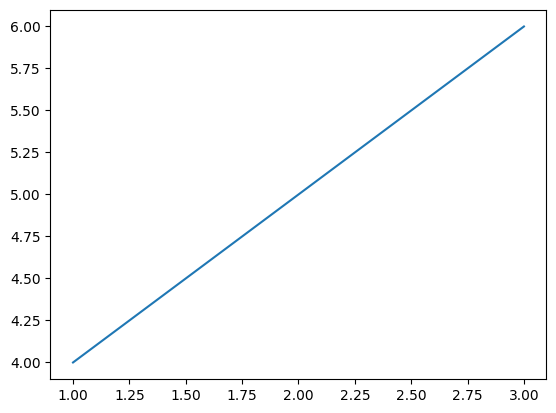

In [9]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [4, 5, 6])
plt.savefig('grafigim_pc_de.png')

print("Grafik PC'ye PNG olarak kaydedildi.")

In [10]:
import os
print(os.getcwd())

C:\Users\furka\TY VERİ ÇEKME PROJE


In [8]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import os
from itertools import combinations


lemmatized_df = pd.read_csv("lemmatize_edilmis.csv", header=None, names=["text"])
stemmed_df = pd.read_csv("stemlenmis_veriler.csv", header=None, names=["text"])
tfidf_lemma = pd.read_csv("tfidf_lemmatized.csv", index_col=0)
tfidf_stem = pd.read_csv("tfidf_stemmed.csv", index_col=0)


sample_index = 100
query_lemma = str(lemmatized_df.iloc[sample_index]["text"])
query_stem = str(stemmed_df.iloc[sample_index]["text"])


query_vector_lemma = tfidf_lemma.iloc[[sample_index]]
query_vector_stem = tfidf_stem.iloc[[sample_index]]
similarities_lemma = cosine_similarity(query_vector_lemma, tfidf_lemma).flatten()
similarities_stem = cosine_similarity(query_vector_stem, tfidf_stem).flatten()

def top5(similarities, df, exclude_idx):
    top = similarities.argsort()[::-1]
    top = [i for i in top if i != exclude_idx][:5]
    return df.iloc[top], similarities[top], top

top5_lemma, scores_lemma, top_idx_lemma = top5(similarities_lemma, lemmatized_df, sample_index)
top5_stem, scores_stem, top_idx_stem = top5(similarities_stem, stemmed_df, sample_index)

pd.DataFrame({"index": top_idx_lemma, "score": scores_lemma, "text": top5_lemma["text"].values}).to_csv("tfidf_lemmatized_top5.csv", index=False)
pd.DataFrame({"index": top_idx_stem, "score": scores_stem, "text": top5_stem["text"].values}).to_csv("tfidf_stemmed_top5.csv", index=False)



def get_average_vector(model_df, tokens):
    vec_cols = [c for c in model_df.columns if c.startswith("dim")]
    word_vecs = [model_df.loc[model_df['word'] == w, vec_cols].values[0] for w in tokens if w in model_df['word'].values]
    return np.mean(word_vecs, axis=0) if word_vecs else np.zeros(len(vec_cols))


model_files = [
    os.path.join("modeller", "lemmatized_model_cbow_window2_dim100.csv"),
    os.path.join("modeller", "lemmatized_model_cbow_window2_dim300.csv"),
    os.path.join("modeller", "lemmatized_model_cbow_window4_dim100.csv"),
    os.path.join("modeller", "lemmatized_model_cbow_window4_dim300.csv"),
    os.path.join("modeller", "lemmatized_model_skipgram_window2_dim100.csv"),
    os.path.join("modeller", "lemmatized_model_skipgram_window2_dim300.csv"),
    os.path.join("modeller", "lemmatized_model_skipgram_window4_dim100.csv"),
    os.path.join("modeller", "lemmatized_model_skipgram_window4_dim300.csv")
]

query_tokens = {"lemmatized": query_lemma.split(), "stemmed": query_stem.split()}
all_texts = {"lemmatized": lemmatized_df["text"].tolist(), "stemmed": stemmed_df["text"].tolist()}


results = {}
for fname in tqdm(model_files):
    if not os.path.isfile(fname):
        print(f"❌ Dosya bulunamadı, atlanıyor: {fname}")
        continue
    model_df = pd.read_csv(fname)
    kind = "lemmatized" if "lemmatized" in fname else "stemmed"
    tokens = query_tokens[kind]
    avg_vec = get_average_vector(model_df, tokens)
    vec_cols = [c for c in model_df.columns if c.startswith("dim")]
    word_vec_map = dict(zip(model_df['word'], model_df[vec_cols].values))

    doc_vecs = []
    for doc in all_texts[kind]:
        words = [word_vec_map[w] for w in doc.split() if w in word_vec_map]
        doc_vecs.append(np.mean(words, axis=0) if words else np.zeros(len(vec_cols)))

    sims = cosine_similarity([avg_vec], doc_vecs).flatten()
    top_idx = [i for i in sims.argsort()[::-1] if i != sample_index][:5]
    top_scores = sims[top_idx]
    top_texts = [all_texts[kind][i] for i in top_idx]
    results[fname] = list(zip(top_idx, top_scores, top_texts))

    output_dir = "w2v_top5"
os.makedirs(output_dir, exist_ok=True)
pd.DataFrame({"index": top_idx, "score": top_scores, "text": top_texts}).to_csv(os.path.join(output_dir, f"{os.path.basename(fname).replace('.csv', '')}.csv"), index=False)


def semantic_score(score):
    return 5 if score >= 0.98 else 4 if score >= 0.95 else 3 if score >= 0.85 else 2 if score >= 0.75 else 1

model_scores = {name: np.mean([semantic_score(score) for _, score, _ in rlist]) for name, rlist in results.items()}
pd.DataFrame(model_scores.items(), columns=["model", "semantic_score"]).to_csv("semantic_scores.csv", index=False)


index_sets = {name: set([idx for idx, _, _ in rlist]) for name, rlist in results.items()}
model_names = list(index_sets.keys())

jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names)
for m1, m2 in combinations(model_names, 2):
    a, b = index_sets[m1], index_sets[m2]
    score = len(a & b) / len(a | b)
    jaccard_matrix.loc[m1, m2] = jaccard_matrix.loc[m2, m1] = score
for m in model_names:
    jaccard_matrix.loc[m, m] = 1.0
jaccard_matrix.to_csv("jaccard_matrix.csv")




100%|██████████| 8/8 [00:00<00:00, 28.32it/s]


In [16]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import os
from itertools import combinations


lemmatized_df = pd.read_csv("lemmatize_edilmis.csv", header=None, names=["text"])
stemmed_df = pd.read_csv("stemlenmis_veriler.csv", header=None, names=["text"])
tfidf_lemma = pd.read_csv("tfidf_lemmatized.csv", index_col=0)
tfidf_stem = pd.read_csv("tfidf_stemmed.csv", index_col=0)


sample_index = 100
query_lemma = str(lemmatized_df.iloc[sample_index]["text"])
query_stem = str(stemmed_df.iloc[sample_index]["text"])
print("Giriş metni (lemmatized):\n" + query_lemma)
print("\nGiriş metni (stemmed):\n" + query_stem)


query_vector_lemma = tfidf_lemma.iloc[[sample_index]]
query_vector_stem = tfidf_stem.iloc[[sample_index]]
similarities_lemma = cosine_similarity(query_vector_lemma, tfidf_lemma).flatten()
similarities_stem = cosine_similarity(query_vector_stem, tfidf_stem).flatten()

def top5(similarities, df, exclude_idx):
    top = similarities.argsort()[::-1]
    top = [i for i in top if i != exclude_idx][:5]
    return df.iloc[top], similarities[top], top

top5_lemma, scores_lemma, top_idx_lemma = top5(similarities_lemma, lemmatized_df, sample_index)
top5_stem, scores_stem, top_idx_stem = top5(similarities_stem, stemmed_df, sample_index)

pd.DataFrame({"index": top_idx_lemma, "score": scores_lemma, "text": top5_lemma["text"].values}).to_csv("tfidf_lemmatized_top5.csv", index=False)
pd.DataFrame({"index": top_idx_stem, "score": scores_stem, "text": top5_stem["text"].values}).to_csv("tfidf_stemmed_top5.csv", index=False)


def get_average_vector(model_df, tokens):
    vec_cols = [c for c in model_df.columns if c.startswith("dim")]
    word_vecs = [model_df.loc[model_df['word'] == w, vec_cols].values[0] for w in tokens if w in model_df['word'].values]
    return np.mean(word_vecs, axis=0) if word_vecs else np.zeros(len(vec_cols))


model_files = [
    os.path.join("modeller", "lemmatized_model_cbow_window2_dim100.csv"),
    os.path.join("modeller", "lemmatized_model_cbow_window2_dim300.csv"),
    os.path.join("modeller", "lemmatized_model_cbow_window4_dim100.csv"),
    os.path.join("modeller", "lemmatized_model_cbow_window4_dim300.csv"),
    os.path.join("modeller", "lemmatized_model_skipgram_window2_dim100.csv"),
    os.path.join("modeller", "lemmatized_model_skipgram_window2_dim300.csv"),
    os.path.join("modeller", "lemmatized_model_skipgram_window4_dim100.csv"),
    os.path.join("modeller", "lemmatized_model_skipgram_window4_dim300.csv"),
    os.path.join("modeller", "stemmed_model_cbow_window2_dim100.csv"),
    os.path.join("modeller", "stemmed_model_cbow_window2_dim300.csv"),
    os.path.join("modeller", "stemmed_model_cbow_window4_dim100.csv"),
    os.path.join("modeller", "stemmed_model_cbow_window4_dim300.csv"),
    os.path.join("modeller", "stemmed_model_skipgram_window2_dim100.csv"),
    os.path.join("modeller", "stemmed_model_skipgram_window2_dim300.csv"),
    os.path.join("modeller", "stemmed_model_skipgram_window4_dim100.csv"),
    os.path.join("modeller", "stemmed_model_skipgram_window4_dim300.csv"),
]

query_tokens = {"lemmatized": query_lemma.split(), "stemmed": query_stem.split()}
all_texts = {"lemmatized": lemmatized_df["text"].tolist(), "stemmed": stemmed_df["text"].tolist()}


results = {}
output_dir = "w2v_top5"
os.makedirs(output_dir, exist_ok=True)

for fname in tqdm(model_files):
    if not os.path.isfile(fname):
        print(f" Dosya bulunamadı, atlanıyor: {fname}")
        continue
    model_df = pd.read_csv(fname)
    kind = "lemmatized" if "lemmatized" in fname else "stemmed"
    tokens = query_tokens[kind]
    avg_vec = get_average_vector(model_df, tokens)
    vec_cols = [c for c in model_df.columns if c.startswith("dim")]
    word_vec_map = dict(zip(model_df['word'], model_df[vec_cols].values))

    doc_vecs = []
    for doc in all_texts[kind]:
        words = [word_vec_map[w] for w in doc.split() if w in word_vec_map]
        doc_vecs.append(np.mean(words, axis=0) if words else np.zeros(len(vec_cols)))

    sims = cosine_similarity([avg_vec], doc_vecs).flatten()
    top_idx = [i for i in sims.argsort()[::-1] if i != sample_index][:5]
    top_scores = sims[top_idx]
    top_texts = [all_texts[kind][i] for i in top_idx]
    results[fname] = list(zip(top_idx, top_scores, top_texts))

    pd.DataFrame({
        "index": top_idx,
        "score": top_scores,
        "text": top_texts
    }).to_csv(os.path.join(output_dir, f"{os.path.basename(fname).replace('.csv', '')}.csv"), index=False)


def semantic_score(score):
    return 5 if score >= 0.98 else 4 if score >= 0.95 else 3 if score >= 0.85 else 2 if score >= 0.75 else 1

model_scores = {
    name: np.mean([semantic_score(score) for _, score, _ in rlist])
    for name, rlist in results.items()
}
pd.DataFrame(model_scores.items(), columns=["model", "semantic_score"]).to_csv("semantic_scores.csv", index=False)


index_sets = {name: set([idx for idx, _, _ in rlist]) for name, rlist in results.items()}
model_names = list(index_sets.keys())

jaccard_matrix = pd.DataFrame(index=model_names, columns=model_names)
for m1, m2 in combinations(model_names, 2):
    a, b = index_sets[m1], index_sets[m2]
    score = len(a & b) / len(a | b)
    jaccard_matrix.loc[m1, m2] = jaccard_matrix.loc[m2, m1] = score
for m in model_names:
    jaccard_matrix.loc[m, m] = 1.0
jaccard_matrix.to_csv("jaccard_matrix.csv")

print(" Benzerlik hesaplamaları tamamlandı. Çıktılar başarıyla kaydedildi.")


Giriş metni (lemmatized):
bluz omzu açık bluz modeli viskon kumaştan üretilmiş olup nefes alabilir kumaş günlük kullanım uyg kolay ütülenir şıklık konfor ara ön çıkan özellik nefes alabilir kumaş günlük kullanım uyg kolay ütülenir siyah bluz

Giriş metni (stemmed):
bluz omz açık bluz model viskon kumaştan üretil olup nefes alabilir kumaş günlük kullanı uygun kolay ütülenir şık konfor bir ara öne çıkan özellik nefes alabilir kumaş günlük kullanı uygun kolay ütülenir siyah bluz


100%|██████████| 16/16 [00:00<00:00, 26.20it/s]

 Benzerlik hesaplamaları tamamlandı. Çıktılar başarıyla kaydedildi.


In [17]:
import os
print(os.getcwd())

C:\Users\furka\TY VERİ ÇEKME PROJE
